# PROJECT TITLE: THE SE HIGHER EDUCATION BRAIN DRAIN

## SETUP

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### IMPORT MAIN DATA SET -- STUDENT ENROLMENTS IN HIGHER EDUCATION 

In [2]:
raw_material = pd.read_csv(r'\Users\rhayes\Desktop\UCD_Data_Analytics_Course\HEA_Student_Enrolment_Data_Domicilary_Origin_201819.csv')

In [3]:
raw_material.head()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined,County
0,1,2018/2019,(Other) EU,(0210) Arts not further defined or elsewhere c...,"National University of Ireland, Galway",NaN
1,1,2018/2019,(Other) EU,"(0212) Fashion, interior and industrial design",IT Carlow,NaN
2,1,2018/2019,(Other) EU,(0413) Management and administration,IT Carlow,NaN
3,1,2018/2019,(Other) EU,(0510) Biological and related sciences not fur...,Technological University Dublin,NaN
4,1,2018/2019,(Other) EU,(0512) Biochemistry,IT Carlow,NaN


## SECTION 1: 
## WHAT COUNTY IN IRELAND HAS THE MOST STUDENTS IN HIGHER EDUCATION? 

### 1.1 Generate Student Data by County

In [4]:
student_population = raw_material.groupby ( ["County"]) ["Number of Students"].agg(sum) # This is the number of students attending higher education from each county

In [5]:
student_population = student_population.reset_index()
student_population

,County,Number of Students
0,Antrim (including Belfast),396
1,Armagh,100
2,Carlow,2763
3,Cavan,2870
4,Clare,5746
5,Cork,25397
6,Derry,255
7,Donegal,6420
8,Down,399
9,Dublin (including postal districts),49026


In [6]:
# Sort out Dublin : This version doesn't seem to work def sort_dublin (student_population):
def sort_dublin (student_population):
    if student_population ["County"] in ["Dublin"]:
        return "Dublin"
    elif student_population ["County"] in ["Antrim (including Belfast)"]:
        return "Antrim"
    else:
        return student_population ["County"]
student_population ["New County Name"] = student_population.apply (sort_dublin, axis=1)

In [7]:
# Sort out Dublin: different method
student_population ["County"] [9]

'Dublin  (including postal districts)'

In [8]:
student_population = student_population.replace(student_population ["County"] [9], "Dublin")

In [9]:
student_population

,County,Number of Students,New County Name
0,Antrim (including Belfast),396,Antrim
1,Armagh,100,Armagh
2,Carlow,2763,Carlow
3,Cavan,2870,Cavan
4,Clare,5746,Clare
5,Cork,25397,Cork
6,Derry,255,Derry
7,Donegal,6420,Donegal
8,Down,399,Down
9,Dublin,49026,Dublin


In [10]:
student_population_final = student_population.drop (["New County Name"], axis=1)
student_population_final = student_population_final.sort_values("Number of Students", ascending=False)
student_population_final

,County,Number of Students
9,Dublin,49026
5,Cork,25397
11,Galway,12808
13,Kildare,9676
17,Limerick,8975
21,Meath,8125
26,Tipperary,7109
12,Kerry,6452
7,Donegal,6420
31,Wexford,6149


In [11]:
# Unsurprisingly, the county sending most students to higher college is Dublin, followed by the Cork and Galway. 
# A more meaningful measure of relative participation would be the proportion of the overall population 
# attending higher education.

### 1.2 Import and Clean Data on County Populations 

#### Scrape data 

In [12]:
scraped_data=pd.read_html("https://citypopulation.de/en/ireland/towns/")

In [13]:
print(len(scraped_data))

2


In [14]:
County_Populations=scraped_data[0]

In [15]:
County_Populations.head()

,Name,Status,PopulationCensus1991-04-21,PopulationCensus1996-04-28,PopulationCensus2002-04-28,PopulationCensus2006-04-23,PopulationCensus2011-04-10,PopulationCensus2016-04-24,Unnamed: 8
0,Carlow,County,40942,41616,46014,50349,54612,56932,→
1,Cavan,County,52796,52944,56546,64003,73183,76176,→
2,Clare,County,90918,94006,103277,110950,117196,118817,→
3,Cork,County,...,...,...,...,319494,333213,→
4,Cork City,City,...,...,...,...,199538,209655,→


#### Only include most recent census information (2016)

In [16]:
County_Populations2016=County_Populations.drop(
    ["PopulationCensus1991-04-21", "PopulationCensus1996-04-28", "PopulationCensus2002-04-28", "PopulationCensus2006-04-23", "PopulationCensus2011-04-10", "Unnamed: 8"],
    axis=1)

In [17]:
County_Populations2016

,Name,Status,PopulationCensus2016-04-24
0,Carlow,County,56932
1,Cavan,County,76176
2,Clare,County,118817
3,Cork,County,333213
4,Cork City,City,209655
5,Donegal,County,159192
6,Dublin City,City,554554
7,Dún Laoghaire-Rathdown,County,218018
8,Fingal,County,296020
9,Galway,County,179390


#### Tidy up Dublin, Cork and Galway populations 

In [18]:
def TidyCountyPop(County_Populations2016): 
    if County_Populations2016 ["Name"] in ["Fingal", "Dublin City", "Dún Laoghaire-Rathdown", "South Dublin"]:
        return "Dublin"
    elif County_Populations2016 ["Name"] in ["Cork City"]:
        return "Cork"
    elif County_Populations2016 ["Name"] in ["Galway City"]:
        return "Galway"
    elif County_Populations2016 ["Name"] in ["Laois (Laoighis)"]:
        return "Laois"
    else:
        return County_Populations2016 ["Name"]


In [19]:
County_Populations2016["New Name"]=County_Populations2016.apply (TidyCountyPop, axis=1)
County_Populations2016

,Name,Status,PopulationCensus2016-04-24,New Name
0,Carlow,County,56932,Carlow
1,Cavan,County,76176,Cavan
2,Clare,County,118817,Clare
3,Cork,County,333213,Cork
4,Cork City,City,209655,Cork
5,Donegal,County,159192,Donegal
6,Dublin City,City,554554,Dublin
7,Dún Laoghaire-Rathdown,County,218018,Dublin
8,Fingal,County,296020,Dublin
9,Galway,County,179390,Galway


In [20]:
County_Populations2016 = County_Populations2016.sort_values("New Name")

In [21]:
County_Populations2016

,Name,Status,PopulationCensus2016-04-24,New Name
0,Carlow,County,56932,Carlow
1,Cavan,County,76176,Cavan
2,Clare,County,118817,Clare
3,Cork,County,333213,Cork
4,Cork City,City,209655,Cork
5,Donegal,County,159192,Donegal
6,Dublin City,City,554554,Dublin
7,Dún Laoghaire-Rathdown,County,218018,Dublin
8,Fingal,County,296020,Dublin
25,South Dublin,County,278767,Dublin


In [22]:
County_Populations2016=County_Populations2016.groupby("New Name").sum(["Dublin", "Cork", "Galway"]).reset_index()

In [23]:
County_Populations2016 # Final table of county populations 2016

,New Name,PopulationCensus2016-04-24
0,Carlow,56932
1,Cavan,76176
2,Clare,118817
3,Cork,542868
4,Donegal,159192
5,Dublin,1347359
6,Galway,258058
7,Ireland (Éire),4761865
8,Kerry,147707
9,Kildare,222504


In [24]:
#

### Merge County and Student Population Information to get a Patricipation Rate 

In [25]:
merged_population_counties = student_population_final.merge (County_Populations2016, left_on="County", right_on="New Name", how="right")

In [26]:
merged_population_counties 

,County,Number of Students,New Name,PopulationCensus2016-04-24
0,Carlow,2763.0,Carlow,56932
1,Cavan,2870.0,Cavan,76176
2,Clare,5746.0,Clare,118817
3,Cork,25397.0,Cork,542868
4,Donegal,6420.0,Donegal,159192
5,Dublin,49026.0,Dublin,1347359
6,Galway,12808.0,Galway,258058
7,NaN,NaN,Ireland (Éire),4761865
8,Kerry,6452.0,Kerry,147707
9,Kildare,9676.0,Kildare,222504


In [27]:
merged_population_counties.dropna()

,County,Number of Students,New Name,PopulationCensus2016-04-24
0,Carlow,2763.0,Carlow,56932
1,Cavan,2870.0,Cavan,76176
2,Clare,5746.0,Clare,118817
3,Cork,25397.0,Cork,542868
4,Donegal,6420.0,Donegal,159192
5,Dublin,49026.0,Dublin,1347359
6,Galway,12808.0,Galway,258058
8,Kerry,6452.0,Kerry,147707
9,Kildare,9676.0,Kildare,222504
10,Kilkenny,4443.0,Kilkenny,99232


In [28]:
merged_population_counties ["Percentage Attending Third Level"] = merged_population_counties ["PopulationCensus2016-04-24"]/ merged_population_counties ["Number of Students"]

In [29]:
merged_population_counties=merged_population_counties.dropna()

In [30]:
merged_population_counties

,County,Number of Students,New Name,PopulationCensus2016-04-24,Percentage Attending Third Level
0,Carlow,2763.0,Carlow,56932,20.605139
1,Cavan,2870.0,Cavan,76176,26.542160
2,Clare,5746.0,Clare,118817,20.678211
3,Cork,25397.0,Cork,542868,21.375281
4,Donegal,6420.0,Donegal,159192,24.796262
5,Dublin,49026.0,Dublin,1347359,27.482540
6,Galway,12808.0,Galway,258058,20.148189
8,Kerry,6452.0,Kerry,147707,22.893211
9,Kildare,9676.0,Kildare,222504,22.995453
10,Kilkenny,4443.0,Kilkenny,99232,22.334459


In [31]:
print(merged_population_counties["Percentage Attending Third Level"].mean())

23.449537100777167


In [32]:
participation_by_county=merged_population_counties.pivot_table(values="Percentage Attending Third Level", index="County")
participation_by_county.sort_values("Percentage Attending Third Level", ascending=False)

,Percentage Attending Third Level
County,
Dublin,27.482540
Laois,27.094370
Monaghan,26.747712
Cavan,26.542160
Longford,25.787382
Offaly,25.027608
Louth,24.972680
Donegal,24.796262
Wexford,24.349000


<AxesSubplot:xlabel='New Name'>

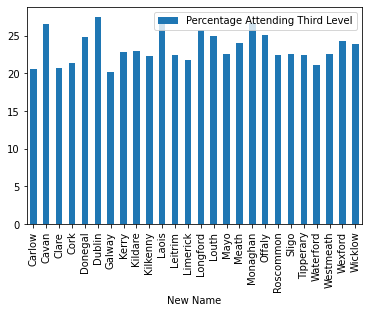

In [33]:
merged_population_counties.plot(x="New Name", y="Percentage Attending Third Level", kind="bar")

In [34]:
# This suggests that there is reasonable uniformity across the counties on the percentage of the population currently in higher education. 
# The percentage varies between 20% and 27%. 
#
# The limitations of the methodology need to be pointed out. 

In [35]:
#

## SECTION 2: 
## WHAT AND WHERE DO STUDENTS FROM THE SOUTH EAST GO TO COLLEGE? 
    

### 2.1 Slice raw material table to generate table only of students from the counties of the South East 

In [36]:
SE_counties=["Carlow", "Kilkenny", "Waterford", "Wexford"]

In [37]:
SE_counties_enrolment=raw_material [raw_material["County"].isin(SE_counties)]

In [38]:
SE_counties_enrolment.head()

,Number of Students,Academic Year,Dom Ireland GB,Isced Discipline,Institute New Combined,County
1237,1,2018/2019,Ireland,(0011) Basic programmes and qualifications,IT Carlow,Carlow
1238,1,2018/2019,Ireland,(0011) Basic programmes and qualifications,"St. Angela's College of Home Economics, Sligo",Carlow
1239,2,2018/2019,Ireland,(0011) Basic programmes and qualifications,Trinity College Dublin,Carlow
1240,1,2018/2019,Ireland,(0011) Basic programmes and qualifications,University College Dublin,Carlow
1241,1,2018/2019,Ireland,(0110) Education not further defined or elsewh...,Dublin City University,Carlow


#### Show a table with the totals for each county in the region and the total enrolment 

In [93]:
SE_overall_enrol = SE_counties_enrolment.groupby ("County") ["Number of Students"].sum() 
SE_overall_enrol

County
Carlow       2763
Kilkenny     4443
Waterford    5490
Wexford      6149
Name: Number of Students, dtype: int64

#### Create Some Comparators: the South West, and the Mid West

In [40]:
SW_counties = ["Kerry", "Cork"] # NUTS3 South West Region of Ireland 
MW_counties = ["Clare", "Tipperary", "Limerick"] # NUTS3 Mid West Region of Ireland 

In [105]:
MW_counties_table = raw_material [raw_material["County"].isin(MW_counties)]
SW_counties_table = raw_material [raw_material["County"].isin(SW_counties)]
SW_total=SW_counties_total.groupby("County") ["Number of Students"].sum()
MW_total=MW_counties_total.groupby("County") ["Number of Students"].sum()
MW_total

County
Clare        5746
Limerick     8975
Tipperary    7109
Name: Number of Students, dtype: int64

In [106]:
SW_total=SW_counties_enrolment ["Number of Students"].sum()
MW_total=MW_counties_enrolment ["Number of Students"].sum()
SE_total=SE_counties_enrolment ["Number of Students"].sum()

In [107]:
Comparator_data ={"Region": ["South West", "Mid West", "South East"], "Enrolment": [SW_total,  MW_total, SE_total]}
pd.DataFrame(Comparator_data)

,Region,Enrolment
0,South West,31849
1,Mid West,21830
2,South East,18845


#### Add in percentage of overall national enrolment 

In [110]:
Comparator_data ["Percent Overall National"]=Comparator_data ["Enrolment"]/(raw_material ["Number of Students"].sum())

In [112]:
Comparator_data=pd.DataFrame(Comparator_data)

In [114]:
print(Comparator_data.set_index("Region"))

            Enrolment  Percent Overall National
Region                                         
South West      31849                  0.139381
Mid West        21830                  0.095535
South East      18845                  0.082472


<AxesSubplot:xlabel='Region'>

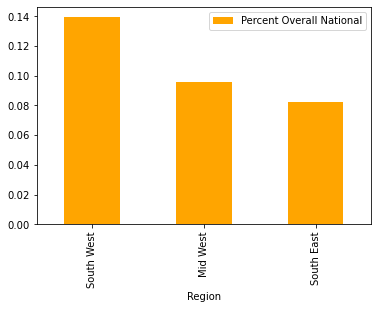

In [136]:
Comparator_data.plot(x="Region", y="Percent Overall National", kind="bar", color="orange")

#### Calculate regional population as % of overall national population 

In [152]:
MW_counties_population = County_Populations2016 [County_Populations2016 ["New Name"].isin(MW_counties)]
SW_counties_population = County_Populations2016 [County_Populations2016 ["New Name"].isin(SW_counties)]
SE_counties_population = County_Populations2016 [County_Populations2016 ["New Name"].isin(SE_counties)]

In [159]:
Comparator_data ["Population Census 2016"] = ([
    SW_counties_population ["PopulationCensus2016-04-24"].sum(), 
    MW_counties_population ["PopulationCensus2016-04-24"].sum(), 
    SE_counties_population ["PopulationCensus2016-04-24"].sum()
])
Comparator_data

,Region,Enrolment,Percent Overall National,Population Census 2016
0,South West,31849,0.139381,690575
1,Mid West,21830,0.095535,473269
2,South East,18845,0.082472,422062


In [163]:
Comparator_data ["Percent National Population"] = Comparator_data ["Population Census 2016"]/County_Populations2016 ["PopulationCensus2016-04-24"].sum()
Comparator_data

,Region,Enrolment,Percent Overall National,Population Census 2016,Percent National Population
0,South West,31849,0.139381,690575,0.072511
1,Mid West,21830,0.095535,473269,0.049694
2,South East,18845,0.082472,422062,0.044317


In [ ]:
# Interesting. SW has 7% of national population but 14% of her students. 
# SE has 4% national population and 8% of her students.

In [43]:
SE_students_discipline = SE_counties_enrolment.groupby("Isced Discipline") ["Number of Students"].sum()
SE_students_discipline = SE_students_discipline.sort_values(ascending=False)
SE_students_discipline

Isced Discipline
(0413) Management and administration                                                                            1705
(0410) Business and administration not further defined or elsewhere classified                                  1035
(0210) Arts not further defined or elsewhere classified                                                          870
(0913) Nursing and midwifery                                                                                     864
(0421) Law                                                                                                       640
                                                                                                                ... 
(0021) Literacy and numeracy                                                                                       3
(0788) Interdisciplinary programmes and qualifications involving engineering, manufacturing and construction       1
(0488) Interdisciplinary programmes and qualifi

In [44]:
SE_student_population=isolateSE2.groupby ("County").sum().reset_index()

NameError: name 'isolateSE2' is not defined

In [ ]:
raw_material_ind=raw_material.set_index ("County")

In [ ]:
isolateSE1=raw_material_ind.loc[ ["Waterford", "Wexford", "Carlow", "Kilkenny"]]

In [ ]:
isolateSE2=isolateSE1.sort_values("Institute New Combined")

In [ ]:
isolateSE2.head()

In [ ]:
print(SE_student_population) #This is the number of students from each County in the SE attending Higher Education 

In [ ]:
raw_material_ind.sort_index()

In [ ]:
raw_material_ind.sort_index(level=["County", "Number of Students"])

In [ ]:
WD_student.head()

In [ ]:
WD_student2=WD_student.groupby (["Institute New Combined"]) ["Number of Students"]. sum()
WD_student2.plot (kind="bar", rot=90)
plt.show()

In [ ]:
WD_student3=WD_student.sort_values("Institute New Combined")
WD_student_excludeWIT=WD_student3[~WD_student3 ["Institute New Combined"].isin("Waterford IT")]


In [ ]:
raw_material.head()

In [ ]:
raw_material_ind=raw_material.set_index("County")

In [ ]:
raw_material_ind.head()

In [ ]:
raw_material_ind.isna()

In [ ]:
raw_material_ind.isna().any()

In [ ]:
raw_material.isna().any()

In [ ]:
raw_material_ind.reset_index()

In [ ]:
raw_material_ind.isna().any()

In [ ]:
raw_material_ind.sort_values("Number of Students", ascending=False)

In [ ]:
raw_material_ind.sort_values("County", ascending=True)

raw_material_ind.groupby("Institute New Combined) ["Number of Students"]. sum()

In [ ]:
most_populace_colleges=raw_material_ind.groupby("Institute New Combined") ["Number of Students"].sum()

In [ ]:
most_populace_colleges.head()

In [ ]:
most_populace_colleges.hist()

In [ ]:
most_populace_colleges.plot(x="Institute New Combined", kind="bar", rot=90)

In [ ]:
most_populace_colleges.head()

In [ ]:
SE_colleges = most_populace_colleges ("Institute New Combined" ["Carlow", "Kilkenny"])

In [ ]:
SE_counties_students = (raw_material ["County"]==["Carlow"])